Projekt z Fizyki Kwantowej

Rachunek zaburzeń niezależnych od czasu

Anna Giszczak, Martyna Toborek

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import math
import sys
from scipy.integrate import tplquad
import cmath

# $$\text{Rachunek zaburzeń bez degeneracji}$$

$$\text{Przykład 1}$$

$$
V(x)=\begin{cases}
			V_0, & \text{x} \in \text{[0,a]}\\
            \infty, & \text{wpp}
		 \end{cases}
$$


In [2]:
h = 6.5821*10**(-16)                #stała diraca
m_e=0.5109*10**(6)/299792458**2     #masa elektronu
x=sp.symbols("x")
y=sp.symbols('y')

In [3]:
def Psi(n,a,x):
    return np.sqrt(2/a)*sp.sin((n *np.pi)/a*x)   
    
def PerturbationEnergy (psi,H_p,b,c):
    psi_n = psi
    return sp.integrate(psi_n.conjugate()*H_p*psi_n,(x,b,c))
    
def IntegralToFunction(psi_m, H_p ,psi_n, b,c):
    return sp.integrate(psi_m.conjugate()*H_p*psi_n,(x,b,c)) 
    
def PerturbationFunction(integral, E_n, E_m, psi_m):
    return integral*psi_m/(E_n-E_m)

def E_n(n,a):
    return n**2*np.pi**2*h**2/(2*m_e*a**2)

Zacznijmy od najprostszego przykładu, czyli przesunięcie dna studni nieskończonego potencjału o wartość $V_0=3 \cdot 10^{-5}eV$, dla stanu podstawowego.

In [4]:
V_01=3*10**(-5) #1eV=1.6*10**(-19)J  #oznaczenia --> _(przyklad)(n)_(rząd)
n_11=1
a=10**(-9)

In [5]:
E_11p= PerturbationEnergy(Psi(n_11,a,x),V_01, 0,a) #poprawka pierwszego rzędu n=1
print(f'Poprawka pierwszego rzędu 1 własności własnej obliczona tą metodą wynosi E_11p={E_11p}') #3*10**(-5)

Poprawka pierwszego rzędu 1 własności własnej obliczona tą metodą wynosi E_11p=0.0000300000000000000


In [6]:
E_11c=E_n(1,a)+E_11p
print(f'Energia całkowita w stanie podstawowym metodą rachunku zaburzeń niezależnych od czasu wynosi' +
      f' E_11c={E_11c}, a energia stanu niezaburzonego wynosi E_11={E_n(1,a)}.')

Energia całkowita w stanie podstawowym metodą rachunku zaburzeń niezależnych od czasu wynosi E_11c=0.376130754913151, a energia stanu niezaburzonego wynosi E_11=0.37610075491315115.


In [7]:
def sum_11(x):
    sum_11 = sp.Function('sum_{11}')
    for m in range(2,5):
        if(m == 2):
            sum_11=PerturbationFunction(IntegralToFunction(Psi(m,a,x), V_01, Psi(n_11,a,x),0,a),E_n(n_11,a),E_n(m,a),Psi(m,a,x)) 
        else:
            sum_11+=PerturbationFunction(IntegralToFunction(Psi(m,a,x), V_01, Psi(n_11,a,x),0,a),E_n(n_11,a),E_n(m,a),Psi(m,a,x)) 
    return  sum_11
sum_11(y) #poprawka funkcji

-2.37815845705084*sin(3141592653.58979*y)*sin(6283185307.17959*y)*sin(6283185307.17959*conjugate(y)) - 0.891809421394065*sin(3141592653.58979*y)*sin(9424777960.76938*y)*sin(9424777960.76938*conjugate(y)) - 0.475631691410168*sin(3141592653.58979*y)*sin(12566370614.3592*y)*sin(12566370614.3592*conjugate(y))

In [8]:
def psi_11(x):
    return (Psi(n_11,a,x) + sum_11(x))
    
print(f'Funkcja zaburzona psi = {psi_11(y)}')
print(f'Funkcja niezburzona wynosi psi = {Psi(n_11,a,x)}')

Funkcja zaburzona psi = -2.37815845705084*sin(3141592653.58979*y)*sin(6283185307.17959*y)*sin(6283185307.17959*conjugate(y)) - 0.891809421394065*sin(3141592653.58979*y)*sin(9424777960.76938*y)*sin(9424777960.76938*conjugate(y)) - 0.475631691410168*sin(3141592653.58979*y)*sin(12566370614.3592*y)*sin(12566370614.3592*conjugate(y)) + 44721.3595499958*sin(3141592653.58979*y)
Funkcja niezburzona wynosi psi = 44721.3595499958*sin(3141592653.58979*x)


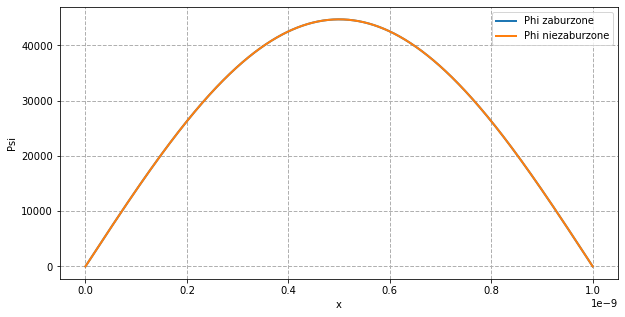

In [9]:
r = np.linspace(0, a, 1000) #r=x

pies=0
kot=[]

for i in range(0,1000):
    pies = psi_11(r[i])
    kot.append(pies)


mysz=0    
chomik=[]
for j in range(0,1000):
    mysz = Psi(n_11,a,r[j])
    chomik.append(mysz)


fig = plt.figure(figsize = (10,5))
line1 = plt.plot(r, kot , 'C0', linewidth = 2, label=f'Phi zaburzone')
line2 = plt.plot(r, chomik, 'C1', linewidth = 2, label=f'Phi niezaburzone')
plt.xlabel('x')
plt.legend()
plt.ylabel('Psi')
plt.grid(linestyle = '--', linewidth = 1)

In [10]:
n_12=2

E_12p=PerturbationEnergy(Psi(n_12,a,x),V_01, 0,a)

print(f' Poprawka energii pierwszego rzędu 2 własności własnej obliczona tą metodą wynosi E_12p={E_12p}.')

 Poprawka energii pierwszego rzędu 2 własności własnej obliczona tą metodą wynosi E_12p=0.0000300000000000000.


Z tego możemy też stwierdzić, że poprawka energii dla każdego stanu wynosi $V_0$.

In [11]:
sum_12 =0
for m in range(3,6):
    sum_12+=PerturbationFunction(IntegralToFunction(Psi(m,a,x), V_01, Psi(n_12,a,x),0,a),E_n(n_12,a),E_n(m,a),Psi(m,a,x))

print(f'Poprawka pierwszego rzędu 2 funkcji własnej wynosi Psi_12p={sum_12}')

Poprawka pierwszego rzędu 2 funkcji własnej wynosi Psi_12p=8.94563786119523e-33*sin(9424777960.76938*x) + 1.06495688823753e-33*sin(15707963267.949*x)


$$\text{Przykład 2}$$

$$
V(x)=\begin{cases}
			V_0, & \text{x} \in [0,\frac{a}{2}]\\
            0, & \text{x} \in [\frac{a}{2},a]\\
            \infty & \text{wpp}
		 \end{cases}
$$

In [12]:
def PerturbationEnergy2(integral, E_n, E_m):
    return np.absolute(integral)**2/(E_n-E_m)

In [13]:
V_02= 3*10**(-5)
n_21 = 1

E_21p= PerturbationEnergy(Psi(n_21,a,x),V_02, 0,a/2)
print(f'Poprawka pierwszego rzędu 1 wartości własnej wynosi E_21p={E_21p}')

Poprawka pierwszego rzędu 1 wartości własnej wynosi E_21p=0.0000150000000000000


W tym przykładzie wartość energii będzie wzrastać dokładnie o 1/2 $\cdot V_0$.

In [14]:
E_21_2p= 0
for m in range(2,3):
    E_21_2p+=PerturbationEnergy2(IntegralToFunction(Psi(m,a,x), V_02, Psi(n_21,a,x),0,a*0.5),E_n(1,a), E_n(m,a))
            
print(f'Poprawka drugiego rzędu 1 wartości własnej wynosi E_21_2p={E_21_2p}')

Poprawka drugiego rzędu 1 wartości własnej wynosi E_21_2p=-1.43679489879581E-10


In [15]:
E_21c = E_21p + E_21_2p +E_n(1,a)

print(f'Energia całkowita w stanie podstawowym metodą rachunku zaburzeń niezależnych od czasu wynosi'+
      f' E_21c={E_21c}, gdzie energia stanu niezaburzonego wynosi E_21={E_n(1,a)}.')

Energia całkowita w stanie podstawowym metodą rachunku zaburzeń niezależnych od czasu wynosi E_21c=0.376115754769472, gdzie energia stanu niezaburzonego wynosi E_21=0.37610075491315115.


In [16]:
def sum_21(x):
    sum_21=0
    for m in range(2,5):
        sum_21+=PerturbationFunction(IntegralToFunction(Psi(m,a,x), V_02, Psi(n_11,a,x),0,a/2),E_n(n_21,a),E_n(m,a),Psi(m,a,x))    
    return sum_21

print(f'Poprawka pierwszego rzędu 1 funkcji własnej wynosi Psi_21p={sum_21(x)}')

Poprawka pierwszego rzędu 1 funkcji własnej wynosi Psi_21p=-0.504660898527248*sin(6283185307.17959*x) - 1.73821318322687e-17*sin(9424777960.76938*x) + 0.0403728718821799*sin(12566370614.3592*x)


In [17]:
def psi_21(x):
    return (Psi(n_21,a,x) + sum_21(x))

print(f'Funkcja niezburzona wynosi psi = {Psi(n_21,a,x)}')
print(f'Funkcja zaburzona psi = {psi_21(x)}')

Funkcja niezburzona wynosi psi = 44721.3595499958*sin(3141592653.58979*x)
Funkcja zaburzona psi = 44721.3595499958*sin(3141592653.58979*x) - 0.504660898527248*sin(6283185307.17959*x) - 1.73821318322687e-17*sin(9424777960.76938*x) + 0.0403728718821799*sin(12566370614.3592*x)


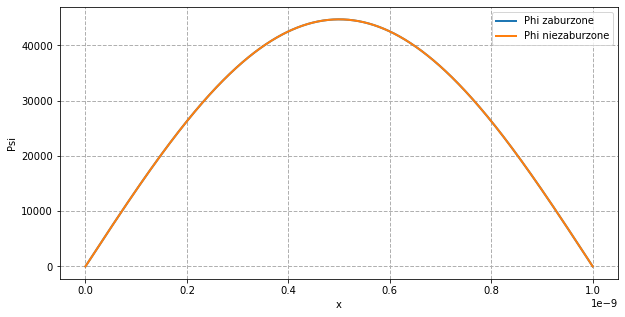

In [18]:
r2 = np.linspace(0, a, 1000) #r=x #a

pies2=0
kot2=[]

for i in range(0,1000):
    pies2 = psi_21(r2[i])
    kot2.append(pies2)

mysz2=0    
chomik2=[]
for j in range(0,1000):
    mysz2 = Psi(n_21,a,r2[j])
    chomik2.append(mysz2)


fig2 = plt.figure(figsize = (10,5))
line12 = plt.plot(r2, kot2 , 'C0', linewidth = 2,label=f'Phi zaburzone')
line22 = plt.plot(r2, chomik2, 'C1', linewidth = 2, label=f'Phi niezaburzone')
plt.xlabel('x')
plt.legend()
plt.ylabel('Psi')
plt.grid(linestyle = '--', linewidth = 1)

In [19]:
n_22=2

E_22_1p=PerturbationEnergy(Psi(n_12,a,x),V_01, 0,a/2)

print(f' Poprawka energii pierwszego rzędu 2 własności własnej obliczona tą metodą wynosi E_22_1p={E_22_1p}.')

 Poprawka energii pierwszego rzędu 2 własności własnej obliczona tą metodą wynosi E_22_1p=0.0000150000000000000.


In [20]:
sum_22 =0
for m in range(3,6):
    sum_22+=PerturbationFunction(IntegralToFunction(Psi(m,a,x), V_01, Psi(n_12,a,x),0,a/2),E_n(n_12,a),E_n(m,a),Psi(m,a,x))

print(f'Poprawka pierwszego rzędu 2 funkcji własnej wynosi Psi_22p={sum_22}')

Poprawka pierwszego rzędu 2 funkcji własnej wynosi Psi_22p=-0.181677923469809*sin(9424777960.76938*x) + 0.0102992020107602*sin(15707963267.949*x)


$$\text{Przykład 3}$$

$$H'=\alpha \delta(x-a/4)+\alpha \delta(x-3a/4)$$

In [47]:
alpha = 1*10**(-15)
n_31 = 1

In [48]:
def FunctionWithDirack (n1,n2,d):
    return Psi(n1,a,d)*Psi(n2,a,d)

In [49]:
E_31p=alpha*FunctionWithDirack(n_31,n_31,a/4) +alpha*FunctionWithDirack(n_31,n_31,3*a/4)
print(f'Poprawka pierwszego rzędu 1 wartości własnej wynosi E_31p={E_31p}')

Poprawka pierwszego rzędu 1 wartości własnej wynosi E_31p=0.00000200000000000000


In [50]:
E_31_2p= 0
for m in range(2,3):
    E_31_2p+=(alpha*FunctionWithDirack(m, n_31,a/4)+alpha*FunctionWithDirack(m,n_31, 3*a/4))**2/(E_n(1,a) - E_n(m,a))
            
print(f'Poprawka drugiego rzędu 1 wartości własnej wynosi E_31_2p={E_31_2p}')

Poprawka drugiego rzędu 1 wartości własnej wynosi E_31_2p=-3.97424983178146E-44


In [52]:
E_31c = E_31p + E_31_2p +E_n(1,a)

print(f'Energia całkowita w stanie podstawowym metodą rachunku zaburzeń niezależnych od czasu wynosi'+
      f' E_31c={E_31c}, gdzie energia stanu niezaburzonego wynosi E_31={E_n(1,a)}.')


Energia całkowita w stanie podstawowym metodą rachunku zaburzeń niezależnych od czasu wynosi E_31c=0.376102754913151, gdzie energia stanu niezaburzonego wynosi E_31=0.37610075491315115.


In [53]:
y=sp.symbols('z')
def sum_31(x):
    sum_31 = sp.Function('sum_{31}')
    for m in range(2,3):
        if(m == 2):
            sum_31=(alpha*FunctionWithDirack(m, n_31,a/4)+alpha*FunctionWithDirack(m,n_31, 3*a/4))*Psi(m,a,x)/(E_n(1,a) - E_n(m,a))
        else:
            sum_31+= (alpha*FunctionWithDirack(m, n_31,a/4)+alpha*FunctionWithDirack(m,n_31, 3*a/4))*Psi(m,a,x)/(E_n(1,a) - E_n(m,a))
    return  sum_31
    
print(f'Poprawka pierwszego rzędu 1 funkcji własnej wynosi Psi_31p={sum_31(y)}')

Poprawka pierwszego rzędu 1 funkcji własnej wynosi Psi_31p=8.3932440288063e-18*sin(6283185307.17959*z)


In [54]:
def psi_31(x):
    
    return (Psi(n_31,a,x) + sum_31(x)) 

print(f'Funkcja zaburzona psi = {psi_31(x)}')
print(f'Funkcja niezburzona wynosi psi = {Psi(n_31,a,x)}')

Funkcja zaburzona psi = 44721.3595499958*sin(3141592653.58979*x) + 8.3932440288063e-18*sin(6283185307.17959*x)
Funkcja niezburzona wynosi psi = 44721.3595499958*sin(3141592653.58979*x)


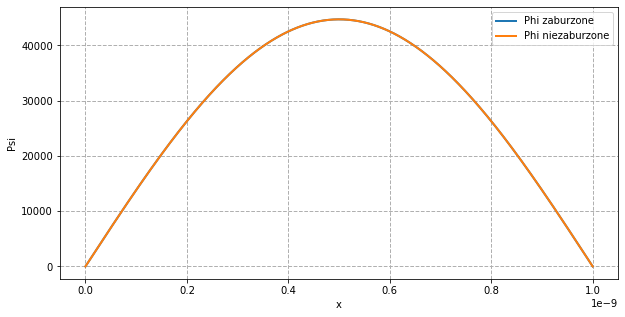

In [55]:
r3 = np.linspace(0, a, 1000) #r=x

pies3=0
kot3=[]

for i in range(0,1000):
    pies3 = psi_31(r3[i])
    kot3.append(pies3)

mysz3=0    
chomik3=[]
for j in range(0,1000):
    mysz3 = Psi(n_31,a,r3[j])
    chomik3.append(mysz3)


fig3 = plt.figure(figsize = (10,5))
line13 = plt.plot(r3, kot3 , 'C0', linewidth = 2, label=f'Phi zaburzone')
line23 = plt.plot(r3, chomik3, 'C1', linewidth = 2, label=f'Phi niezaburzone')
plt.xlabel('x')
plt.legend()
# plt.ylim(-1,1)
# plt.xlim(np.min(x), np.max(x))
plt.ylabel('Psi')
plt.grid(linestyle = '--', linewidth = 1)

$$\text{Przykład 4}$$

$$\text{Efekt Starka w atomie wodoru}$$

Jest to zjawisko fizyczne polegające na rozszczepieniu oraz przesunięciu linii spektralnych atomu lub cząsteczki wysyłających lub absorbujących kwanty świetlne wywołane oddziaływaniem pola elektrycznego.

$$H'=-e\varepsilon r \cos{\theta}$$

n = 1,2,3,..    ;   l=0,1,2,...,(n-1)       ;        $m\in (-l;l)$

In [38]:
#n_5=1 => l=0 => m=0
e=sp.symbols('e',real=True) #ładunek elektronu
epsilon=sp.symbols('\u03B5',real=True) #energia pola elektrycznego
r=sp.symbols('r', real=True, positive=True)
teta=sp.symbols('\u03B8', real=True, positive=True)
fi=sp.symbols('\u03C6', real=True, positive=True)
a_0=0.5*10**(-10) #odległość pierwszej orbity atomu wodoru

H_p5=-e*epsilon*r*sp.cos(teta)  

psi51_00=1/(sp.sqrt(sp.pi*a_0**3))*sp.exp(-r/a_0)

E_51=sp.integrate(sp.integrate(sp.integrate(psi51_00.conjugate()*H_p5*psi51_00,(fi,0,2*sp.pi)),(teta,0,sp.pi)),(r,0,np.inf))
E_51

0

W efekcie Starka dla n=2 zachodzi degenracja. 

$$\text{Rachunek zaburzeń z degeneracją}$$

$$\text{Przykład 5}$$

$$\text{Efekt Starka w atomie wodoru z degeneracją}$$

Elementy macierzy zawierające funkcje:

In [60]:
n_5=2 #=> l=0 v l=1 => m =-1 v m=0 v m=1

E_52p=sp.symbols('E')

psi52_00=1/sp.sqrt(8*sp.pi*a_0**3)*(1-r/(2*a_0))*sp.exp(-r/(2*a_0))

psi52_1_1 = 1/(sp.sqrt(sp.pi*a_0**3))*(r/(8*a_0))*sp.sin(teta)*sp.exp(-r/(2*a_0))*sp.exp(-i*fi) #*im_1_1

psi52_10=1/sp.sqrt(8*sp.pi*a_0**3)*(r/(2*a_0))*sp.cos(teta)*sp.exp(-r/(2*a_0))

psi52_11= 1/(sp.sqrt(sp.pi*a_0**3))*(r/(8*a_0))*sp.sin(teta)*sp.exp(-r/(2*a_0))*sp.exp(i*fi) #*im_11


In [61]:
calkaFi = sp.integrate(sp.exp(-1j*fi),(fi,0,2*sp.pi))
calkaFi

-1.0*I + 1.0*I*exp(-2.0*I*pi)

równają się zero, także te elementy macierzy się zerują

In [62]:
Maa=sp.integrate(sp.integrate(sp.integrate(psi52_00*H_p5*psi52_00*r**2*sp.sin(teta),(r,0,sp.oo)),(fi,0,2*sp.pi)),(teta,0,sp.pi))

Mab=0

Mac=sp.integrate(sp.integrate(sp.integrate(psi52_00*H_p5*psi52_10*r**2*sp.sin(teta),(r,0,sp.oo)),(fi,0,2*sp.pi)),(teta,0,sp.pi))

Mad=0

Mba=0

Mbb=0

Mbc=0

Mbd=0

Mca=sp.integrate(sp.integrate(sp.integrate(psi52_10*H_p5*psi52_00*r**2*sp.sin(teta),(r,0,sp.oo)),(fi,0,2*sp.pi)),(teta,0,sp.pi))

Mcb=0

Mcc=sp.integrate(sp.integrate(sp.integrate(psi52_10*H_p5*psi52_10*r**2*sp.sin(teta),(r,0,sp.oo)),(fi,0,2*sp.pi)),(teta,0,sp.pi))

Mcd=0

Mda=0

Mdb=0

Mdc=0

Mdd=0

M = sp.Matrix([[Maa-E_52p, Mab, Mac, Mad],
              [Mba, Mbb-E_52p, Mbc, Mbd],
              [Mca, Mcb, Mcc-E_52p, Mcd],
              [Mda, Mdb, Mdc, Mdd-E_52p]])
M

Matrix([
[         -E,  0, 1.5e-10*e*ε,  0],
[          0, -E,           0,  0],
[1.5e-10*e*ε,  0,          -E,  0],
[          0,  0,           0, -E]])

In [63]:
eq1=sp.Eq(M.det(),0)
solutions = sp.solve((eq1),(E_52p))
solutions

[0.0, -1.5e-10*e*ε, 1.5e-10*e*ε]

In [64]:
E_50 = sp.sympify(13.6*1/(n_5**2))#eV

E_52cp = solutions[2] + E_50 #dla m=0
E_52cm = solutions[1] + E_50 #dla m=0
E_52cs = solutions[0] + E_50 #dla m=+/- 1
print(f'Poprawki pierwszego rzędu 1 wartości własnej wynoszą E_52p^+={solutions[2]} i E_52p^-={solutions[1]} '+
      f'dla m=0 oraz E_52p^0={solutions[0]} dla m=+/-1. Natomiast całkowite wartości energi są równe odpowiednio '+
      f'E_52cp = {E_52cp}, E_52cm = {E_52cm} i E_52cs={E_52cs}. ')

Poprawki pierwszego rzędu 1 wartości własnej wynoszą E_52p^+=1.5e-10*e*ε i E_52p^-=-1.5e-10*e*ε dla m=0 oraz E_52p^0=0.0 dla m=+/-1. Natomiast całkowite wartości energi są równe odpowiednio E_52cp = 1.5e-10*e*ε + 3.4, E_52cm = -1.5e-10*e*ε + 3.4 i E_52cs=3.40000000000000. 


Skorzystamy ze wzorów na obliczenie funkcji własnych dla danych energii

In [65]:
#Dla energii (+) E_52cp
Psi_52p = 1/sp.sqrt(2)*(psi52_00-psi52_10)
#Dla energii (-) E_52cm
Psi_52m = 1/sp.sqrt(2)*(psi52_00+psi52_10)

In [66]:
Psi_52p

sqrt(2)*(-1.0e+25*r*exp(-10000000000.0*r)*cos(θ)/sqrt(pi) + 1.0e+15*(1 - 10000000000.0*r)*exp(-10000000000.0*r)/sqrt(pi))/2

In [67]:
Psi_52m

sqrt(2)*(1.0e+25*r*exp(-10000000000.0*r)*cos(θ)/sqrt(pi) + 1.0e+15*(1 - 10000000000.0*r)*exp(-10000000000.0*r)/sqrt(pi))/2

$$\text{Przykład 6}$$

Podwójna studnia nieskończona ( ściany w punktach: $x=-\frac{L}{2}$, $x=0$, $x=\frac{L}{2}$, gdzie L - szerokość studni, s-szerokość zaburzenia)

$$
H_p(x)=\begin{cases}
			0, & \text{x} \in (-\frac{L}{2},-\frac{s}{2})\\
            -V_0, & \text{x} \in (-\frac{s}{2},0)\\
            V_0, & \text{x} \in (0, \frac{s}{2})\\
            0, & \text{x} \in (\frac{s}{2},\frac{L}{2})\\
            \infty & \text{wpp}
		 \end{cases}
$$

Znormalizowane stany podstawowe funkcji niezaburzonej
$$
\varphi(x)=\begin{cases}
			r = \sqrt{\frac{4}{L}}\sin{\frac{2\pi x}{L}}, & \text{x} \in (0,\frac{L}{2})\\
            l = -\sqrt{\frac{4}{L}}\sin{\frac{2\pi x}{L}}, & \text{x} \in (-\frac{L}{2},0)\\
             \infty & \text{wpp}
		 \end{cases}
$$

Funkcja niezaburzona stanu podstawowy

$$E = 4\frac{\hbar^2 \pi^2}{2mL^2}$$

Nasz wzrór ogólny wygląda następująco:
$$E^1_{\pm} = W_{rr}+W_{ll}\pm\sqrt{(W_{rr}-W_{ll})^2+4|W_{rl}|^2}$$

Na potrzeby zadania możemy uprościć powyższy ogólny wzór, wiedząc, że:
$$ W_{rl}=W_{lr}=0 $$
$$ W_{rr}=-W_{ll} $$

In [68]:
def PlusDegeneratedEnergy (W_rr): #+epsilon_b
    return W_rr

def MinusDegeneratedEnergy (W_rr): #-epsilon_b
    return -W_rr

In [69]:
L = 10**(-9)
La = 10**(-9)/2
V_04 = 1.5061*10**(-4)

In [70]:
E_41plus = PlusDegeneratedEnergy(IntegralToFunction(Psi(1,L/2,x), V_04, Psi(1,L/2,x) , 0,La/2))

E_41minus = MinusDegeneratedEnergy(IntegralToFunction(Psi(1,L/2,x), V_04, Psi(1,L/2,x) , 0,La/2) )
print(f'Poprawki pierwszego rzędu 1 wartości własnej wynosi  E_41p = {E_41plus} lub {E_41minus}')

Poprawki pierwszego rzędu 1 wartości własnej wynosi  E_41p = 0.0000753050000000000 lub -0.0000753050000000000


In [71]:
E_41cp = (E_41plus + E_n(1,L/2))
E_41cm = (E_41minus + E_n(1,L/2))
print(f'Energia całkowita zaburzonej studni nieskończonej wynosi Eb+={E_41cp} Eb-={E_41cm}')

Energia całkowita zaburzonej studni nieskończonej wynosi Eb+=1.50447832465260 Eb-=1.50432771465260
